In [48]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pdb
import pandas as pd

# all units SI (meters, kg, etc.)
distance = 7
height = 2.0378
m = 0.141748
R_l = 0.0508
R_u = 0.03175
R_b = 0.0889
A = 0.0248286665
interval = 0.001
run = True

In [49]:
def iterate():
    global run
    for w_r in range(20,600): #6380 falcon 500 rpm in radians/s
        for theta in range(15,75):
            if(run):
                trajectory(w_r, theta*math.pi/180)
    #print("done")
    run = True

In [50]:
def trajectory(w, theta):
    v_i = (w*R_l + 9/16*w*R_u)/2
    #print(v)
    s = (0.51)*(w*R_l - (9/16)*w*R_u)/(2*math.pi*R_b)
    runPath(w,v_i,s,theta)

In [51]:
def runPath(w,v_i,s,theta_i):
    t = 0
    v_x = v_i*math.cos(theta_i)
    v_y = v_i*math.sin(theta_i)
    theta = theta_i
    x_dist = 0
    y_dist = 0
    through = True
    x = [0]
    y = [0]
    while(through):
        x_dist += v_x*interval
        y_dist += v_y*interval
        x.append(x_dist)
        y.append(y_dist)
        v_n = math.sqrt(v_x*v_x + v_y*v_y)
        theta = angle(v_x,v_y)
     
        magnus = magnusF(s, v_n)
        drag = dragF(v_n)
        v_x -= (magnus*math.sin(theta) + drag*math.cos(theta))*interval
        v_y -= (drag*math.sin(theta) + 9.8 - magnus*math.cos(theta))*interval
        t += interval
        
        if(((x_dist > distance - .015) and (x_dist < distance + .015)) and ((y_dist > height - .015) and (y_dist < height + .015))):
            through = False
            global w_min
            plt.plot(x,y)
#             omega_array.append(round(w*60/(2*math.pi),2))
#             theta_array.append(round(theta_i*180/math.pi,2))
#             velocity_array.append(round(v_i,2))
#             spin_array.append(round(s,2))
#             time_array.append(round(t,3))
            print ("motor_rpm: " + str(round(w*60/(2*math.pi),2)) + " angle: " + str(round(theta_i*180/math.pi,2)))
            print("velocity: " + str(round(v_i,2)) + " spin: " + str(round(s,2)) + " time: " + str(round(t,3)))
            print()  
        if((x_dist > (distance + 0.2)) or (y_dist < 0)):
            through = False
        if(y_dist > 3.5):
            through = False
      

In [52]:
def magnusF(s,v):
    return (0.04)*(16/3)*(math.pi*math.pi)*1.229*(R_b**3)*s*v/m
def dragF(v):
    return (0.1)*(1.229/2)*A*(v**2)/m
def angle(x,y):
    return math.atan(y/x)

running at distance: 2.3
motor_rpm: 1986.25 angle: 63.0
velocity: 7.14 spin: 6.26 time: 0.747

motor_rpm: 1986.25 angle: 64.0
velocity: 7.14 spin: 6.26 time: 0.776

motor_rpm: 1986.25 angle: 65.0
velocity: 7.14 spin: 6.26 time: 0.807

motor_rpm: 1995.8 angle: 62.0
velocity: 7.17 spin: 6.29 time: 0.717

motor_rpm: 1995.8 angle: 63.0
velocity: 7.17 spin: 6.29 time: 0.744

motor_rpm: 1995.8 angle: 64.0
velocity: 7.17 spin: 6.29 time: 0.782

motor_rpm: 1995.8 angle: 65.0
velocity: 7.17 spin: 6.29 time: 0.813

motor_rpm: 1995.8 angle: 66.0
velocity: 7.17 spin: 6.29 time: 0.839

motor_rpm: 1995.8 angle: 67.0
velocity: 7.17 spin: 6.29 time: 0.875

motor_rpm: 2005.35 angle: 61.0
velocity: 7.21 spin: 6.32 time: 0.69

motor_rpm: 2005.35 angle: 62.0
velocity: 7.21 spin: 6.32 time: 0.716

motor_rpm: 2005.35 angle: 67.0
velocity: 7.21 spin: 6.32 time: 0.877

motor_rpm: 2014.9 angle: 61.0
velocity: 7.24 spin: 6.35 time: 0.687

motor_rpm: 2014.9 angle: 68.0
velocity: 7.24 spin: 6.35 time: 0.91

motor

motor_rpm: 3409.1 angle: 45.0
velocity: 12.26 spin: 10.74 time: 0.276

motor_rpm: 3418.65 angle: 45.0
velocity: 12.29 spin: 10.77 time: 0.275

motor_rpm: 3428.2 angle: 45.0
velocity: 12.32 spin: 10.8 time: 0.274

motor_rpm: 3437.75 angle: 45.0
velocity: 12.36 spin: 10.83 time: 0.272

motor_rpm: 3447.3 angle: 45.0
velocity: 12.39 spin: 10.86 time: 0.271

motor_rpm: 3456.85 angle: 45.0
velocity: 12.43 spin: 10.89 time: 0.27

motor_rpm: 3466.39 angle: 45.0
velocity: 12.46 spin: 10.92 time: 0.269

motor_rpm: 3475.94 angle: 45.0
velocity: 12.5 spin: 10.95 time: 0.268

motor_rpm: 3485.49 angle: 45.0
velocity: 12.53 spin: 10.98 time: 0.267

motor_rpm: 3495.04 angle: 45.0
velocity: 12.56 spin: 11.01 time: 0.267

motor_rpm: 3504.59 angle: 45.0
velocity: 12.6 spin: 11.04 time: 0.266

motor_rpm: 3514.14 angle: 45.0
velocity: 12.63 spin: 11.07 time: 0.265

motor_rpm: 3523.69 angle: 45.0
velocity: 12.67 spin: 11.1 time: 0.264

motor_rpm: 3533.24 angle: 45.0
velocity: 12.7 spin: 11.13 time: 0.264

m

motor_rpm: 4965.63 angle: 43.0
velocity: 17.85 spin: 15.64 time: 0.181

motor_rpm: 4994.28 angle: 43.0
velocity: 17.95 spin: 15.73 time: 0.18

motor_rpm: 5357.16 angle: 42.0
velocity: 19.26 spin: 16.87 time: 0.167

motor_rpm: 5385.8 angle: 42.0
velocity: 19.36 spin: 16.96 time: 0.166

motor_rpm: 5414.45 angle: 42.0
velocity: 19.46 spin: 17.05 time: 0.165

motor_rpm: 5424.0 angle: 42.0
velocity: 19.5 spin: 17.08 time: 0.165

motor_rpm: 5443.1 angle: 42.0
velocity: 19.57 spin: 17.14 time: 0.164

motor_rpm: 5452.65 angle: 42.0
velocity: 19.6 spin: 17.17 time: 0.164

motor_rpm: 5471.75 angle: 42.0
velocity: 19.67 spin: 17.23 time: 0.163

motor_rpm: 5481.3 angle: 42.0
velocity: 19.71 spin: 17.26 time: 0.163

motor_rpm: 5490.85 angle: 42.0
velocity: 19.74 spin: 17.29 time: 0.163

motor_rpm: 5500.39 angle: 42.0
velocity: 19.77 spin: 17.32 time: 0.162

motor_rpm: 5509.94 angle: 42.0
velocity: 19.81 spin: 17.35 time: 0.162

motor_rpm: 5519.49 angle: 42.0
velocity: 19.84 spin: 17.38 time: 0.162


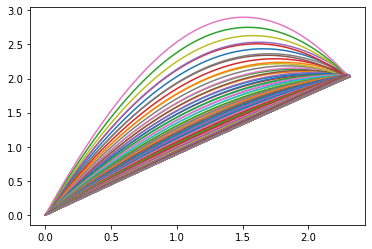

In [53]:
distance = 2.3
print("running at distance: " + str(distance))

iterate()
